In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot
    
def plot_acc(history):
    sns.set()

    fig = pyplot.figure(0, (12, 4))

    ax = pyplot.subplot(1, 2, 1)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
    pyplot.title('Accuracy')
    pyplot.tight_layout()

    ax = pyplot.subplot(1, 2, 2)
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
    pyplot.title('Loss')
    pyplot.tight_layout()

    pyplot.show()

In [3]:
data = pd.read_csv('Darknet.csv')

In [4]:
no_tor = data.loc[data['Label'] == 'Non-Tor']
tor = data.loc[data['Label'] == 'Tor']
no_vpn = data.loc[data['Label'] == 'NonVPN']
vpn = data.loc[data['Label'] == 'VPN']

In [5]:
no_tor = no_tor[:10000]
no_vpn = no_vpn[:10000]
vpn = vpn[:10000]

In [6]:
pdlist = [no_tor, tor, no_vpn, vpn]

In [7]:
new_data = pd.concat(pdlist)

In [8]:
new_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [9]:
Y = new_data['Label']

In [10]:
data = new_data[['Flow Duration',
 'Bwd Packet Length Min',
 'Fwd Header Length',
 'Fwd Packets/s']]

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state= 42)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
moodel = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [16]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        np.savetxt('loss_history.txt', np.array([self.losses, self.val_losses]).T)

# Instantiate the custom callback
loss_history_callback = LossHistory()

In [17]:
moodel.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [18]:
history = moodel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[loss_history_callback]
)

Epoch 1/50
785/785 [==============================] - 5s 4ms/step - loss: 171714.4375 - accuracy: 0.4153 - val_loss: 74978.1484 - val_accuracy: 0.4423
Epoch 2/50
785/785 [==============================] - 4s 4ms/step - loss: 55029.5430 - accuracy: 0.4396 - val_loss: 39736.2695 - val_accuracy: 0.5026
Epoch 3/50
785/785 [==============================] - 4s 5ms/step - loss: 29133.8770 - accuracy: 0.4447 - val_loss: 32843.6562 - val_accuracy: 0.4956
Epoch 4/50
785/785 [==============================] - 4s 5ms/step - loss: 12421.6396 - accuracy: 0.4547 - val_loss: 8246.9795 - val_accuracy: 0.5786
Epoch 5/50
785/785 [==============================] - 3s 4ms/step - loss: 4026.1411 - accuracy: 0.4674 - val_loss: 1273.8685 - val_accuracy: 0.4173
Epoch 6/50
785/785 [==============================] - 4s 5ms/step - loss: 1385.6638 - accuracy: 0.4807 - val_loss: 703.1549 - val_accuracy: 0.3416
Epoch 7/50
785/785 [==============================] - 4s 5ms/step - loss: 238.7986 - accuracy: 0.5074 - v

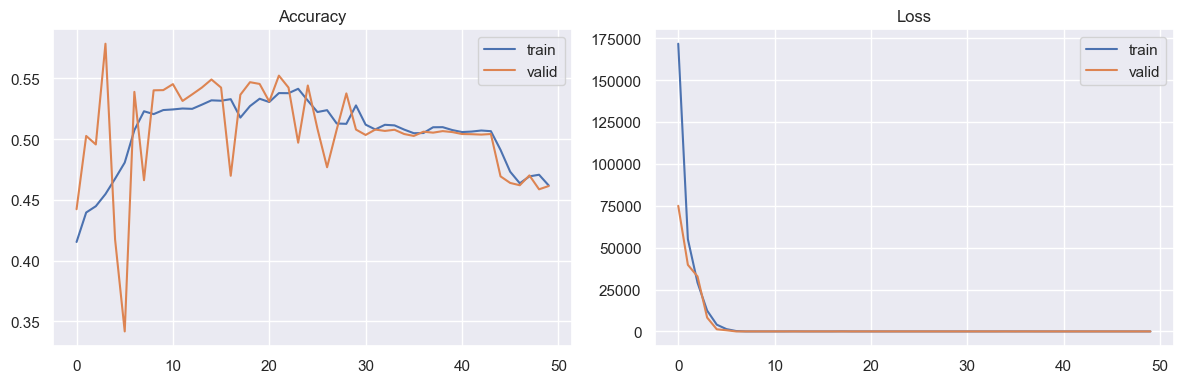

In [19]:
plot_acc(history)

In [20]:
new_data.to_csv('new_data.csv',',')

In [21]:
data.to_csv('test_data.csv', ',')

In [22]:
import joblib

In [23]:
moodel.save('dlmodel.h5')

In [24]:
joblib.dump(le, 'labelencoderfordl.joblib')

['labelencoderfordl.joblib']